<div style="text-align: left;">
<table style="width:100%; background-color:transparent;">
  <tr style="background-color:transparent;">
    <td style="background-color:transparent;">[<img src="http://project.inria.fr/saclaycds/files/2017/02/logoUPSayPlusCDS_990.png" width="70%">](http://www.datascience-paris-saclay.fr)</td>
  </tr>
</table> 
</div>


# [RAMP](https://www.ramp.studio/problems/solar_wind) on detecting Solar storms

_Joris van den Bossche, Gautier Nguyen, Nicolas Aunai & Balazs Kegl_

Interplanetary Coronal Mass Ejections (ICMEs) result from magnetic instabilities occurring in the Sun atmosphere, and interact with the planetary environment and may result in intense internal activity such as strong particle acceleration, so-called geomagnetic storms and geomagnetic induced currents. These effects have serious consequences regarding space and ground technologies and understanding them is part of the so-called space weather discipline.

ICMEs signatures as measured by in-situ spacecraft come as patterns in time series of the magnetic field, the particle density, bulk velocity, temperature etc. Although well visible by expert eyes, these patterns have quite variable characteristics which make naive automatization of their detection difficult.

The goal of this RAMP is to detect Interplanetary Coronal Mass Ejections (ICMEs) in the data measured by in-situ spacecraft.


![](img/illustration_solar_wind.png)




ICMEs are the interplanetary counterpart of Coronal Mass Ejections (CMEs), the expulsion of large quantities of plasma and magnetic field that result from magnetic instabilities occurring in the Sun atmosphere (Kilpua et al. (2017) and references therein).  They travel at several hundred or thousands of kilometers per second and, if in their trajectory, can reach Earth in 2-4 days.

ICMEs interact with the planetary environment and may result in intense internal activity such as strong particle acceleration, so-called geomagnetic storms and geomagnetic induced currents. These effects have serious consequences regarding space and ground technologies and understanding them is part of the so-called space weather discipline.
ICMEs signatures as measured by in-situ spacecraft thus come as patterns in time series of the magnetic field, the particle density, bulk velocity, temperature etc. Although well visible by expert eyes, these patterns have quite variable characteristics which makes naive automatization of their detection difficult. To overcome this problem, Lepping et al. (2005) proposed an automatic detection method based on manually set thresholds on a set of physical parameters. However, the method allowed to detect only 60 % of the ICMEs with a high percentage of false positives (60%). Moreover, because of the subjectivity induced by the manually set threshold, the method had difficulties to create a reproducible and constant ICME catalog.

This challenge proposes to design the best algorithm  to detect ICMEs from the most complete ICME catalog containing 657 events. We propose to give to the users a subset of this large dataset in order to test and calibrate their algorithm. We provide in-situ data measurement by the WIND spacecraft between 1997 and 2016, that we sampled to a 10 minutes resolution and for which we computed three additional features that proved to be useful in the visual identification of ICMEs. Using an appropriate metric, we will compare the true solution to the estimation. The goal is to provide an ICME catalog containing less than 10% of false positives while recording as much existing event as possible.

Formally, each instance will consist of a measurement of various physical parameters in the interplanetary medium. The training set will contain data measurement from 1997 to 2010 and the beginning and ending dates of the 438 ICMEs that were measured in this period : tstart and tend.

## Table of Content

0. [Prerequisites](#Software-prerequisites)
1. [Introduction about the competition](#Introduction:-what-is-this-challenge-about)
3. [The data](#The-data)
4. [Workflow](#Workflow)
5. [Evaluation](#Evaluation)
6. [Submission](#Submitting-to-the-online-challenge:-ramp.studio)
7. [More information](#More-information)
8. [Questions](#Question)

**To download and run this notebook**: download the [full starting kit](https://github.com/ramp-kits/autism/archive/master.zip), with all the necessary files.

## Getting started with the RAMP starting kit

### Software prerequisites

This starting kit requires the following dependencies:

* `numpy`
* `pandas`
* `pyarrow`
* `scikit-learn`
* `matplolib`
* `jupyter`
* `imbalanced-learn`

We recommend to install those using `conda` (using the `Anaconda` distribution).

In addition, `ramp-workflow` is needed. This can be installed from the master branch on GitHub:

    python -m pip install https://api.github.com/repos/paris-saclay-cds/ramp-workflow/zipball/master

### Getting the data

The public train and test data can be downloaded by running from the root of the starting kit:

    python download_data.py


## The data

We start with inspecting the training data:

In [3]:
from problem import get_train_data

data_train, labels_train = get_train_data()

In [4]:
data_train.head()

,B,Bx,Bx_rms,By,By_rms,Bz,Bz_rms,Na_nl,Np,Np_nl,...,Range F 8,Range F 9,V,Vth,Vx,Vy,Vz,Beta,Pdyn,RmsBob
1997-10-01 00:00:00,6.584763,3.753262,2.303108,0.966140,2.602693,-5.179685,2.668414,2.290824,23.045732,24.352797,...,2.757919e+09,2.472087e+09,378.313934,80.613098,-351.598389,-138.521454,6.956387,7.641340,5.487331e-15,0.668473
1997-10-01 00:10:00,6.036456,0.693559,1.810752,-0.904843,2.165570,-1.944006,2.372931,2.119593,23.000492,20.993362,...,3.365612e+09,3.087122e+09,350.421021,69.919327,-331.012146,-110.970787,-21.269474,9.149856,4.783776e-15,0.753848
1997-10-01 00:20:00,5.653682,-4.684786,0.893058,-2.668830,0.768677,1.479302,1.069266,2.876815,20.676191,17.496399,...,1.675611e+09,1.558640e+09,328.324493,92.194435,-306.114899,-117.035202,-13.018987,11.924199,3.719768e-15,0.282667
1997-10-01 00:30:00,5.461768,-4.672382,1.081638,-2.425630,0.765681,1.203713,0.934445,2.851195,20.730188,16.747108,...,1.589037e+09,1.439569e+09,319.436859,94.230705,-298.460938,-110.403969,-20.350492,16.032987,3.525211e-15,0.304713
1997-10-01 00:40:00,6.177846,-5.230110,1.046126,-2.872561,0.635256,1.505010,0.850657,3.317076,20.675701,17.524536,...,1.812308e+09,1.529260e+09,327.545929,89.292595,-307.303070,-111.865845,-12.313167,10.253789,3.694283e-15,0.244203


In [55]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 509834 entries, 1997-10-01 00:00:00 to 2007-12-31 23:50:00
Data columns (total 33 columns):
B             509834 non-null float32
Bx            509834 non-null float32
Bx_rms        509834 non-null float32
By            509834 non-null float32
By_rms        509834 non-null float32
Bz            509834 non-null float32
Bz_rms        509834 non-null float32
Na_nl         509834 non-null float32
Np            509834 non-null float32
Np_nl         509834 non-null float32
Range F 0     509834 non-null float32
Range F 1     509834 non-null float32
Range F 10    509834 non-null float32
Range F 11    509834 non-null float32
Range F 12    509834 non-null float32
Range F 13    509834 non-null float32
Range F 14    509834 non-null float32
Range F 2     509834 non-null float32
Range F 3     509834 non-null float32
Range F 4     509834 non-null float32
Range F 5     509834 non-null float32
Range F 6     509834 non-null float32
Range F 7     50983

In [5]:
labels_train.head()

1997-10-01 00:00:00    0
1997-10-01 00:10:00    0
1997-10-01 00:20:00    0
1997-10-01 00:30:00    0
1997-10-01 00:40:00    0
Name: label, dtype: int64

### An example ICME "solar storm" event

ICMEs signatures as measured by in-situ spacecraft thus come as patterns in time series of the magnetic field, the particle density, bulk velocity, temperature etc. 

Let's visualize a typical event to inspect the patterns.

In [72]:
%matplotlib inline

In [80]:
def plotEvent(start, end, data, delta=36):
    start = pd.to_datetime(start)
    end = pd.to_datetime(end)
    subset = data[(start - pd.Timedelta(hours=delta)):(end + pd.Timedelta(hours=delta))]
    
    fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10,15), sharex=True)
    
    # plot 1
    axes[0].plot(subset.index, subset['B'], color='gray', linewidth=2.5)
    axes[0].plot(subset.index, subset['Bx'])
    axes[0].plot(subset.index, subset['By'])
    axes[0].plot(subset.index, subset['Bz'])
    axes[0].legend(['B', 'Bx', 'By', 'Bz (nT)'],loc='center left', bbox_to_anchor=(1, 0.5))
    axes[0].set_ylabel('Magnetic Field (nT)')

    # plot 2
    axes[1].plot(subset.index, subset['Beta'], color='gray')
    axes[1].set_ylim(-0.05, 1.7)
    axes[1].set_ylabel('Beta')

    # plot 3
    axes[2].plot(subset.index, subset['V'], color='gray')
    axes[2].set_ylabel('V(km/s)')
    #axes[2].set_ylim(250, 500)
    
    # plot 4
    axes[3].plot(subset.index, subset['Vth'], color='gray')
    axes[3].set_ylabel('$V_{th}$(km/s)')
    #axes[3].set_ylim(5, 60)

    # add vertical lines
    for ax in axes:
        ax.axvline(start, color='k')
        ax.axvline(end, color='k')
        ax.xaxis.grid(True, which="minor")
    
    return fig, axes

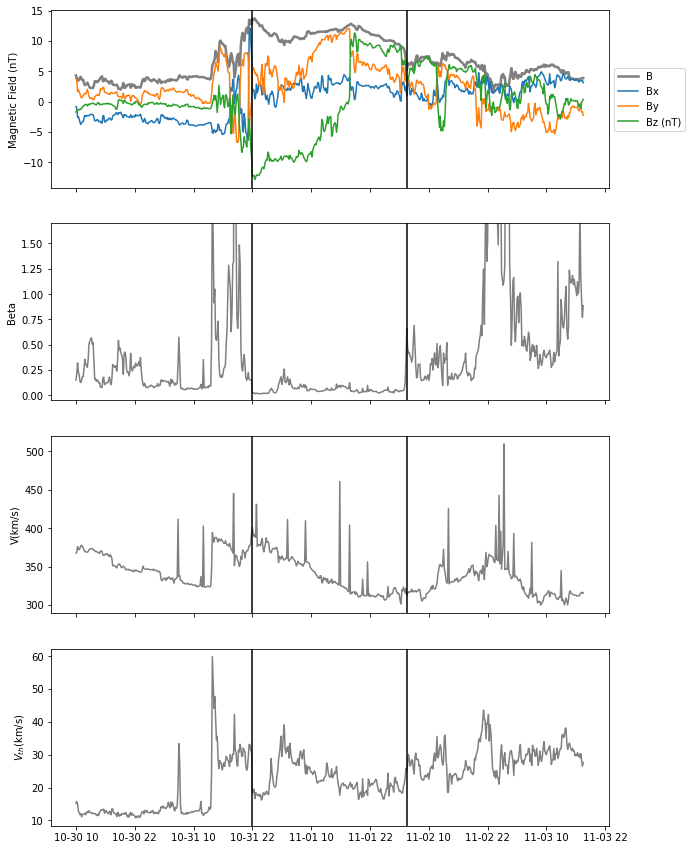

In [81]:
plotEvent(pd.Timestamp("2001-10-31 22:00:00"), pd.Timestamp("2001-11-02 05:30:00"), data_train);

Not all events will be "text-book" examples and don't always exhibit all typical characteristics.

Visualizing some more, randomly drawn events:

In [73]:
from problem import turnPredictionToEventList

In [31]:
events = turnPredictionToEventList(labels_train)

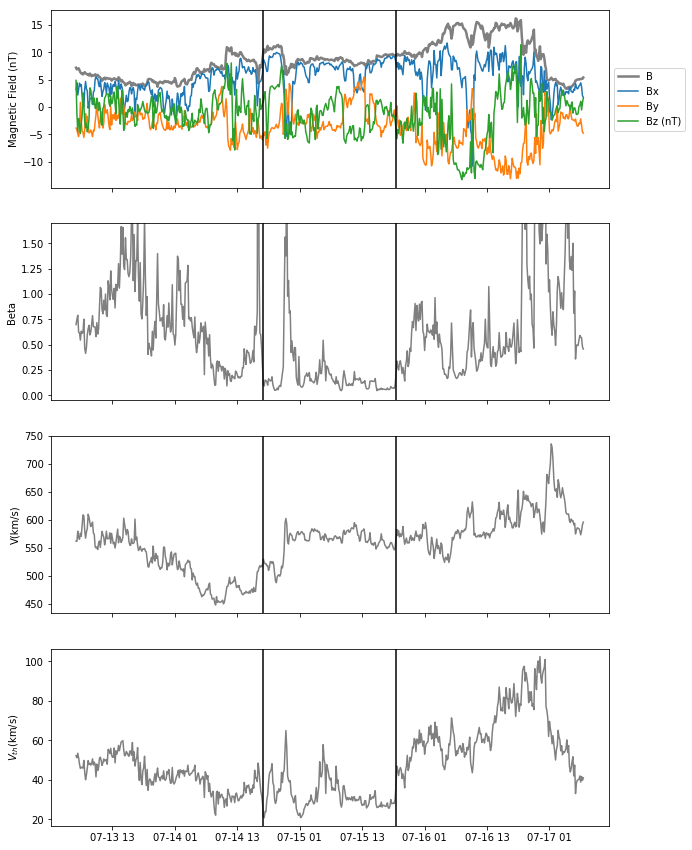

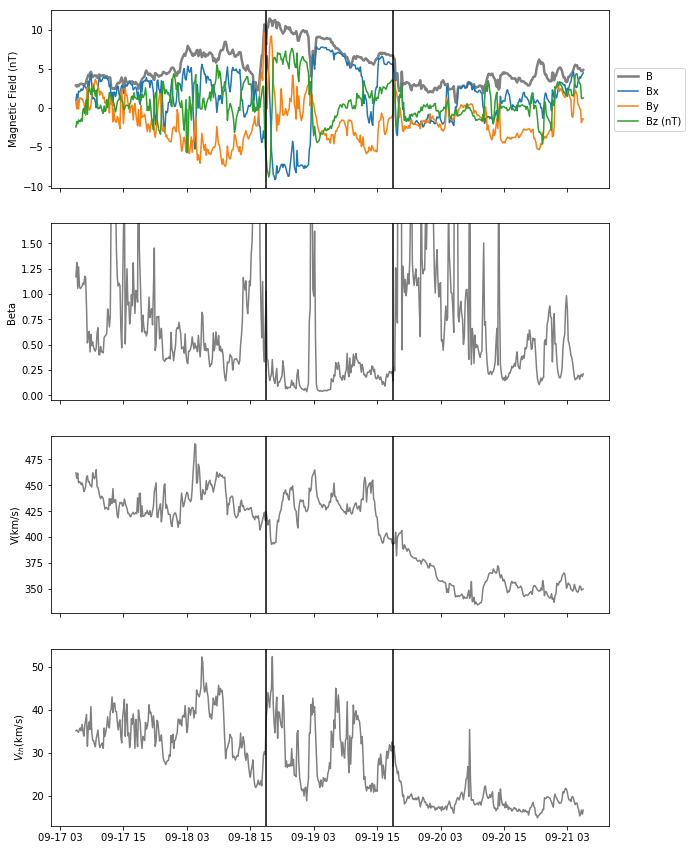

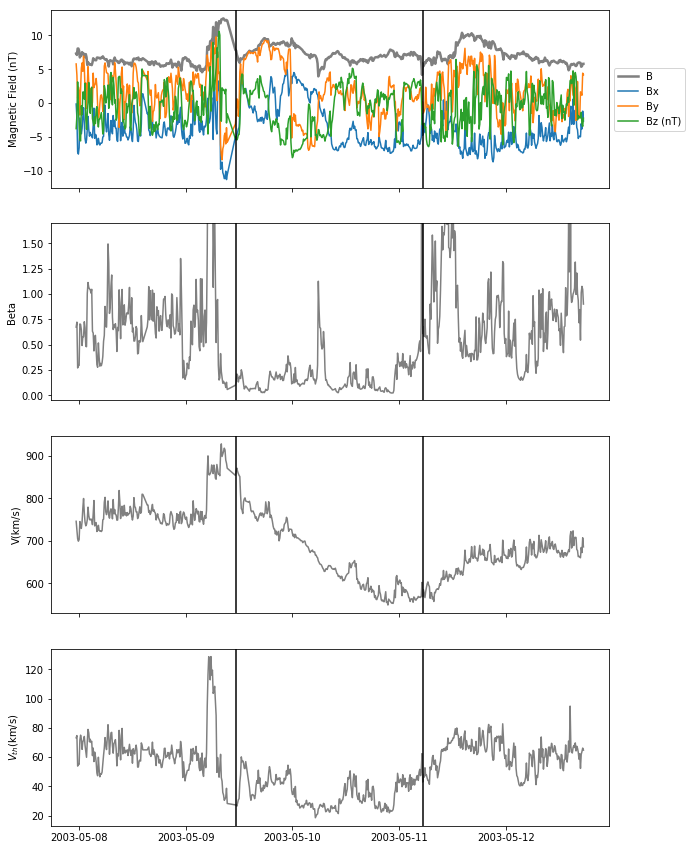

In [84]:
rng = np.random.RandomState(1234)

for i in rng.randint(0, len(events), 3):
    plotEvent(events[i].begin, events[i].end, data_train)

### The duration of events

The ICME's can take from several hours to several days. 

In [100]:
duration = [ev.end - ev.begin for ev in events]
duration = pd.Series(duration).dt.total_seconds() / 60 / 60

The average duration in hours:

In [101]:
duration.mean()

23.512135922330103

And a distribution of all events in the training dataset:

Text(0.5,0,'Duration of an ICME event (hours)')

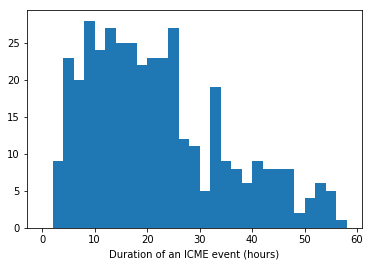

In [99]:
fig, ax = plt.subplots()
ax.hist(pd.Series(duration).dt.total_seconds() / 60 / 60, bins=np.arange(0, 60, 2))
ax.set_xlabel("Duration of an ICME event (hours)")

### Number of events show a cycle

In [103]:
event_starts = pd.Series([ev.begin for ev in events])

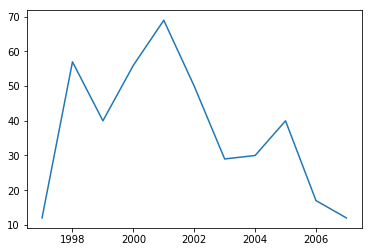

In [105]:
event_starts.groupby(event_starts.dt.year).size().plot()

#### Testing data

The testing data can be loaded similarly as follows:

In [13]:
from problem import get_test_data

data_test, labels_test = get_test_data()


In [14]:
data_test.head()

,participants_site,participants_sex,participants_age,anatomy_lh_bankssts_area,anatomy_lh_caudalanteriorcingulate_area,anatomy_lh_caudalmiddlefrontal_area,anatomy_lh_cuneus_area,anatomy_lh_entorhinal_area,anatomy_lh_fusiform_area,anatomy_lh_inferiorparietal_area,...,anatomy_select,fmri_basc064,fmri_basc122,fmri_basc197,fmri_craddock_scorr_mean,fmri_harvard_oxford_cort_prob_2mm,fmri_motions,fmri_msdl,fmri_power_2011,fmri_select
subject_id,,,,,,,,,,,,,,,,,,,,,
5181409268393785348,31,M,12.200000,985.0,723.0,2851.0,1844.0,495.0,3526.0,5658.0,...,1,./data/fmri/basc064/5181409268393785348/run_1/...,./data/fmri/basc122/5181409268393785348/run_1/...,./data/fmri/basc197/5181409268393785348/run_1/...,./data/fmri/craddock_scorr_mean/51814092683937...,./data/fmri/harvard_oxford_cort_prob_2mm/51814...,./data/fmri/motions/5181409268393785348/run_1/...,./data/fmri/msdl/5181409268393785348/run_1/518...,./data/fmri/power_2011/5181409268393785348/run...,1
8797865049371315550,9,M,14.000000,1174.0,506.0,1890.0,1327.0,462.0,3564.0,4408.0,...,1,./data/fmri/basc064/8797865049371315550/run_1/...,./data/fmri/basc122/8797865049371315550/run_1/...,./data/fmri/basc197/8797865049371315550/run_1/...,./data/fmri/craddock_scorr_mean/87978650493713...,./data/fmri/harvard_oxford_cort_prob_2mm/87978...,./data/fmri/motions/8797865049371315550/run_1/...,./data/fmri/msdl/8797865049371315550/run_1/879...,./data/fmri/power_2011/8797865049371315550/run...,1
6486385878325245147,20,M,14.425000,1288.0,568.0,2406.0,1546.0,432.0,3497.0,4808.0,...,1,./data/fmri/basc064/6486385878325245147/run_1/...,./data/fmri/basc122/6486385878325245147/run_1/...,./data/fmri/basc197/6486385878325245147/run_1/...,./data/fmri/craddock_scorr_mean/64863858783252...,./data/fmri/harvard_oxford_cort_prob_2mm/64863...,./data/fmri/motions/6486385878325245147/run_1/...,./data/fmri/msdl/6486385878325245147/run_1/648...,./data/fmri/power_2011/6486385878325245147/run...,1
17126438435398394588,33,M,22.880200,1179.0,991.0,2427.0,1771.0,363.0,3579.0,6082.0,...,1,./data/fmri/basc064/17126438435398394588/run_1...,./data/fmri/basc122/17126438435398394588/run_1...,./data/fmri/basc197/17126438435398394588/run_1...,./data/fmri/craddock_scorr_mean/17126438435398...,./data/fmri/harvard_oxford_cort_prob_2mm/17126...,./data/fmri/motions/17126438435398394588/run_1...,./data/fmri/msdl/17126438435398394588/run_1/17...,./data/fmri/power_2011/17126438435398394588/ru...,1
16638049522113999228,2,M,8.252055,1064.0,721.0,2445.0,1453.0,561.0,3262.0,4885.0,...,2,./data/fmri/basc064/16638049522113999228/run_1...,./data/fmri/basc122/16638049522113999228/run_1...,./data/fmri/basc197/16638049522113999228/run_1...,./data/fmri/craddock_scorr_mean/16638049522113...,./data/fmri/harvard_oxford_cort_prob_2mm/16638...,./data/fmri/motions/16638049522113999228/run_1...,./data/fmri/msdl/16638049522113999228/run_1/16...,./data/fmri/power_2011/16638049522113999228/ru...,0


In [15]:
print(labels_test)

[0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 0 0 1 0 1 1 0 0]


## Workflow

<img src="./img/workflow.png" width="100%">

### The model to submit

The submission consists of two files: `feature_extractor.py` which defines a `FeatureExtractor` class, and `classifier.py` which defines a `Classifier` class

- `FeatureExtractor` can (optionally) hold code to calculate and add additional features.
- `Classifier` fits the model and predicts on (new) data, as outputted by the `FeatureExtractor`. The prediction should be in the form of a (n_samples, 2) array with the probabilities of the two classes.

---

An example `FeatureExtractor`, adding an additional feature based on a moving window to include some 

In [132]:
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin



class FeatureExtractor(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X_df, y):
        return self

    def transform(self, X_df):
        X_df_new = X_df.copy()
        X_df_new = compute_rolling_std(X_df_new, 'Beta', '2h')
        return X_df_new


def compute_rolling_std(data, feature, time_window, center=False):
    """
    For a given dataframe, compute the standard deviation over
    a defined period of time (time_window) of a defined feature

    Parameters
    ----------
    data : dataframe
    feature : str
        feature in the dataframe we wish to compute the rolling mean from
    time_indow : str
        string that defines the length of the time window passed to `rolling`
    center : bool
        boolean to indicate if the point of the dataframe considered is
        center or end of the window
    """
    name = '_'.join([feature, time_window, 'std'])
    data[name] = data[feature].rolling(time_window, center=center).std()
    data[name] = data[name].ffill().bfill()
    return data


In [131]:
from sklearn.base import BaseEstimator
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


class Classifier(BaseEstimator):
    def __init__(self):
        self.model = make_pipeline(StandardScaler(), LogisticRegression())

    def fit(self, X, y):
        self.model.fit(X, y)

    def predict_proba(self, X):
        return self.model.predict_proba(X)


In [133]:
from sklearn.pipeline import make_pipeline

In [134]:
model = make_pipeline(FeatureExtractor(), Classifier())

In [135]:
model.fit(data_train, labels_train)

Pipeline(memory=None,
     steps=[('featureextractor', FeatureExtractor()), ('classifier', Classifier())])

In [136]:
y_pred = model.predict_proba(data_train)

/home/joris/miniconda3/lib/python3.5/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [128]:
y_pred

array([[  1.00000000e+00,   3.45701744e-13],
       [  1.00000000e+00,   1.34690419e-14],
       [  1.00000000e+00,   9.15227621e-16],
       ..., 
       [  9.93692046e-01,   6.30795376e-03],
       [  9.88161410e-01,   1.18385901e-02],
       [  9.82131878e-01,   1.78681225e-02]])

In [129]:
s_y_pred = pd.Series(y_pred[:, 1], index=labels_train.index)

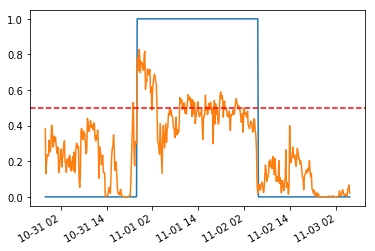

In [138]:
ax = labels_train[pd.Timestamp("2001-10-30 22:00:00") : pd.Timestamp("2001-11-03 05:30:00")].plot()
s_y_pred[pd.Timestamp("2001-10-30 22:00:00") : pd.Timestamp("2001-11-03 05:30:00")].plot(ax=ax)
ax.axhline(0.5, color='r', linestyle='--')

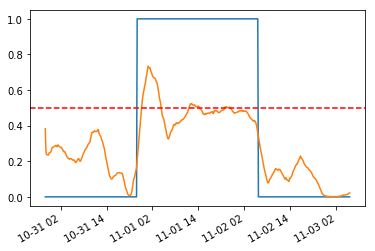

In [140]:
ax = labels_train[pd.Timestamp("2001-10-30 22:00:00") : pd.Timestamp("2001-11-03 05:30:00")].plot()
s_y_pred[pd.Timestamp("2001-10-30 22:00:00") : pd.Timestamp("2001-11-03 05:30:00")].rolling('3H').mean().plot(ax=ax)
ax.axhline(0.5, color='r', linestyle='--')

In [ ]:
plotEvent(pd.Timestamp("2001-10-31 22:00:00"), pd.Timestamp("2001-11-02 05:30:00"), data_train);

In [ ]:
def plotEvent(start, end, delta=36):
    start = pd.to_datetime(start)
    end = pd.to_datetime(end)
    subset = data[(start - pd.Timedelta(hours=delta)):(end + pd.Timedelta(hours=delta))]
    subset_labels = labels[]
    
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,15), sharex=True)
    
    # plot 1
    axes[0].plot(subset.index, subset['B'], color='gray', linewidth=2.5)
    axes[0].plot(subset.index, subset['Bx'])
    axes[0].plot(subset.index, subset['By'])
    axes[0].plot(subset.index, subset['Bz'])
    axes[0].legend(['B', 'Bx', 'By', 'Bz (nT)'],loc='center left', bbox_to_anchor=(1, 0.5))
    axes[0].set_ylabel('Magnetic Field (nT)')

    # plot 2
    axes[1].plot(subset.index, subset['Beta'], color='gray')
    axes[1].set_ylim(-0.05, 1.7)
    axes[1].set_ylabel('Beta')

    # add vertical lines
    for ax in axes[:2]:
        ax.axvline(start, color='k')
        ax.axvline(end, color='k')
        ax.xaxis.grid(True, which="minor")
    
    axes[2].plot(subset.index, subset['Beta'], color='gray')
    
    return fig, axes

In [ ]:
s

### Evaluation

The framework is evaluated with a cross-validation approach. The metrics used are the AUC under the ROC and the accuracy.

In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
from problem import get_cv

def evaluation(X, y):
    pipe = make_pipeline(FeatureExtractor(), Classifier())
    cv = get_cv(X, y)
    results = cross_validate(pipe, X, y, scoring=['roc_auc', 'accuracy'], cv=cv,
                             verbose=1, return_train_score=True,
                             n_jobs=1)
    
    return results

### Simple starting kit: using only anatomical features

#### FeatureExtractor

The available structural data can be used directly to make some classification. In this regard, we will use a feature extractor (i.e. `FeatureExtractor`). This extractor will only select only the anatomical features, dropping any information regarding the fMRI-based features.

In [17]:
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin


class FeatureExtractor(BaseEstimator, TransformerMixin):
    def fit(self, X_df, y):
        return self

    def transform(self, X_df):
        # get only the anatomical information
        X = X_df[[col for col in X_df.columns if col.startswith('anatomy')]]
        return X.drop(columns='anatomy_select')


#### Classifier

We propose to use a logistic classifier preceded from a scaler which will remove the mean and standard deviation computed on the training set.

In [18]:
from sklearn.base import BaseEstimator
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline


class Classifier(BaseEstimator):
    def __init__(self):
        self.clf = make_pipeline(StandardScaler(), LogisticRegression())

    def fit(self, X, y):
        self.clf.fit(X, y)
        return self
        
    def predict(self, X):
        return self.clf.predict(X)

    def predict_proba(self, X):
        return self.clf.predict_proba(X)


#### Testing the submission

We can test locally our pipeline using `evaluation` function that we defined earlier.

In [19]:
import numpy as np

In [20]:
results = evaluation(data_train, labels_train)

print("Training score ROC-AUC: {:.3f} +- {:.3f}".format(np.mean(results['train_roc_auc']),
                                                        np.std(results['train_roc_auc'])))
print("Validation score ROC-AUC: {:.3f} +- {:.3f} \n".format(np.mean(results['test_roc_auc']),
                                                          np.std(results['test_roc_auc'])))

print("Training score accuracy: {:.3f} +- {:.3f}".format(np.mean(results['train_accuracy']),
                                                         np.std(results['train_accuracy'])))
print("Validation score accuracy: {:.3f} +- {:.3f}".format(np.mean(results['test_accuracy']),
                                                           np.std(results['test_accuracy'])))

Training score ROC-AUC: 0.850 +- 0.004
Validation score ROC-AUC: 0.652 +- 0.016 

Training score accuracy: 0.772 +- 0.007
Validation score accuracy: 0.622 +- 0.016


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.1s finished


### Going further: using fMRI-derived features

<img src="./img/full_fmri_pipeline.png" width="70%">

From the framework illustrated in the figure above, steps 1 to 2 already have been computed during some preprocessing and are the data given during this challenge. Therefore, our feature extractor will implement the step #3 which correspond to the extraction of functional connectivity features. Step 4 is identical to the pipeline presented for the anatomy with a standard scaler followed by a logistic regression classifier.

We pointed out that the available feature for fMRI are filename to the time-series. In order to limit the amount of data to be downloaded, we provide a fetcher `fetch_fmri_time_series()` to download only the time-series linked to a specific atlases.

In [21]:
from download_data import fetch_fmri_time_series
help(fetch_fmri_time_series)

Help on function fetch_fmri_time_series in module download_data:

fetch_fmri_time_series(atlas='all')
    Fetch the time-series extracted from the fMRI data using a specific
    atlas.
    
    Parameters
    ----------
    atlas : string, default='all'
        The name of the atlas used during the extraction. The possibilities
        are:
    
        * `'basc064`, `'basc122'`, `'basc197'`: BASC parcellations with 64,
        122, and 197 regions [1]_;
        * `'craddock_scorr_mean'`: Ncuts parcellations [2]_;
        * `'harvard_oxford_cort_prob_2mm'`: Harvard-Oxford anatomical
        parcellations;
        * `'msdl'`: MSDL functional atlas [3]_;
        * `'power_2011'`: Power atlas [4]_.
    
    Returns
    -------
    None
    
    References
    ----------
    .. [1] Bellec, Pierre, et al. "Multi-level bootstrap analysis of stable
       clusters in resting-state fMRI." Neuroimage 51.3 (2010): 1126-1139.
    
    .. [2] Craddock, R. Cameron, et al. "A whole brain fMRI atlas 

In [22]:
fetch_fmri_time_series(atlas='msdl')

You can download all atlases at once by passing `atlas='all'`. It is also possible to execute the file as a script `python download_data.py all`.

In the `FeatureExtractor` below, we first only select the filename related to the MSDL time-series data. We create a `FunctionTransformer` which will read on-the-fly the time-series from the CSV file and store them into a numpy array.
Those series will be used to extract the functional connectivity matrices which will be used later in the classifier.

In [23]:
import numpy as np
import pandas as pd

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer

from nilearn.connectome import ConnectivityMeasure


def _load_fmri(fmri_filenames):
    """Load time-series extracted from the fMRI using a specific atlas."""
    return np.array([pd.read_csv(subject_filename,
                                 header=None).values
                     for subject_filename in fmri_filenames])


class FeatureExtractor(BaseEstimator, TransformerMixin):
    def __init__(self):
        # make a transformer which will load the time series and compute the
        # connectome matrix
        self.transformer_fmri = make_pipeline(
            FunctionTransformer(func=_load_fmri, validate=False),
            ConnectivityMeasure(kind='tangent', vectorize=True))
        
    def fit(self, X_df, y):
        # get only the time series for the MSDL atlas
        fmri_filenames = X_df['fmri_msdl']
        self.transformer_fmri.fit(fmri_filenames, y)
        return self

    def transform(self, X_df):
        fmri_filenames = X_df['fmri_msdl']
        return self.transformer_fmri.transform(fmri_filenames)


/home/lemaitre/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [24]:
from sklearn.base import BaseEstimator
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline


class Classifier(BaseEstimator):
    def __init__(self):
        self.clf = make_pipeline(StandardScaler(), LogisticRegression(C=1.))

    def fit(self, X, y):
        self.clf.fit(X, y)
        return self
       
    def predict(self, X):
        return self.clf.predict(X)

    def predict_proba(self, X):
        return self.clf.predict_proba(X)


In [25]:
results = evaluation(data_train, labels_train)

print("Training score ROC-AUC: {:.3f} +- {:.3f}".format(np.mean(results['train_roc_auc']),
                                                        np.std(results['train_roc_auc'])))
print("Validation score ROC-AUC: {:.3f} +- {:.3f} \n".format(np.mean(results['test_roc_auc']),
                                                          np.std(results['test_roc_auc'])))

print("Training score accuracy: {:.3f} +- {:.3f}".format(np.mean(results['train_accuracy']),
                                                         np.std(results['train_accuracy'])))
print("Validation score accuracy: {:.3f} +- {:.3f}".format(np.mean(results['test_accuracy']),
                                                           np.std(results['test_accuracy'])))

Training score ROC-AUC: 1.000 +- 0.000
Validation score ROC-AUC: 0.612 +- 0.019 

Training score accuracy: 1.000 +- 0.000
Validation score accuracy: 0.587 +- 0.021


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  4.1min finished


### More elaborate pipeline: combining anatomy and fMRI

This workflow is a combination of the 2 previous workflows. The `FeatureExtractor` is extracting both structural and functional connectivity information and concatenate them. Note that each column will contain in their name either **connectome** or **anatomy** depending of the type of feature. It will be used to train different classifiers later on.

In [26]:
import numpy as np
import pandas as pd

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer

from nilearn.connectome import ConnectivityMeasure


def _load_fmri(fmri_filenames):
    """Load time-series extracted from the fMRI using a specific atlas."""
    return np.array([pd.read_csv(subject_filename,
                                 header=None).values
                     for subject_filename in fmri_filenames])


class FeatureExtractor(BaseEstimator, TransformerMixin):
    def __init__(self):
        # make a transformer which will load the time series and compute the
        # connectome matrix
        self.transformer_fmri = make_pipeline(
            FunctionTransformer(func=_load_fmri, validate=False),
            ConnectivityMeasure(kind='tangent', vectorize=True))
    
    def fit(self, X_df, y):
        fmri_filenames = X_df['fmri_msdl']
        self.transformer_fmri.fit(fmri_filenames, y)
        return self

    def transform(self, X_df):
        fmri_filenames = X_df['fmri_msdl']
        X_connectome = self.transformer_fmri.transform(fmri_filenames)
        X_connectome = pd.DataFrame(X_connectome, index=X_df.index)
        X_connectome.columns = ['connectome_{}'.format(i)
                                for i in range(X_connectome.columns.size)]
        # get the anatomical information
        X_anatomy = X_df[[col for col in X_df.columns
                          if col.startswith('anatomy')]]
        X_anatomy = X_anatomy.drop(columns='anatomy_select')
        # concatenate both matrices
        return pd.concat([X_connectome, X_anatomy], axis=1)


We will create a classifier (i.e. a random forest classifier) which will used both connectome and anatomical features.

In [27]:
import numpy as np

from sklearn.base import BaseEstimator
from sklearn.ensemble import RandomForestClassifier


class Classifier(BaseEstimator):
    def __init__(self):
        self.clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)

    def fit(self, X, y):
        self.clf.fit(X, y)
        return self
    
    def predict(self, X):
        return self.clf.predict(X)

    def predict_proba(self, X):
        return self.clf.predict_proba(X)


In [28]:
results = evaluation(data_train, labels_train)

print("Training score ROC-AUC: {:.3f} +- {:.3f}".format(np.mean(results['train_roc_auc']),
                                                        np.std(results['train_roc_auc'])))
print("Validation score ROC-AUC: {:.3f} +- {:.3f} \n".format(np.mean(results['test_roc_auc']),
                                                          np.std(results['test_roc_auc'])))

print("Training score accuracy: {:.3f} +- {:.3f}".format(np.mean(results['train_accuracy']),
                                                         np.std(results['train_accuracy'])))
print("Validation score accuracy: {:.3f} +- {:.3f}".format(np.mean(results['test_accuracy']),
                                                           np.std(results['test_accuracy'])))

Training score ROC-AUC: 1.000 +- 0.000
Validation score ROC-AUC: 0.655 +- 0.028 

Training score accuracy: 1.000 +- 0.000
Validation score accuracy: 0.613 +- 0.033


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  4.1min finished


We can propose a
more complex classifier than the previous one. We will train 2 single classifiers independetly on the sMRI-derived and fMRI-derived features. Then, a meta-classifier will be used to combine both information. We left out some data to be able to train the meta-classifier.

In [29]:
import numpy as np

from sklearn.base import BaseEstimator
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split


class Classifier(BaseEstimator):
    def __init__(self):
        self.clf_connectome = make_pipeline(StandardScaler(),
                                            LogisticRegression(C=1.))
        self.clf_anatomy = make_pipeline(StandardScaler(),
                                         LogisticRegression(C=1.))
        self.meta_clf = LogisticRegression(C=1.)

    def fit(self, X, y):
        X_anatomy = X[[col for col in X.columns if col.startswith('anatomy')]]
        X_connectome = X[[col for col in X.columns
                          if col.startswith('connectome')]]
        train_idx, validation_idx = train_test_split(range(y.size),
                                                     test_size=0.33,
                                                     shuffle=True,
                                                     random_state=42)
        X_anatomy_train = X_anatomy.iloc[train_idx]
        X_anatomy_validation = X_anatomy.iloc[validation_idx]
        X_connectome_train = X_connectome.iloc[train_idx]
        X_connectome_validation = X_connectome.iloc[validation_idx]
        y_train = y[train_idx]
        y_validation = y[validation_idx]

        self.clf_connectome.fit(X_connectome_train, y_train)
        self.clf_anatomy.fit(X_anatomy_train, y_train)

        y_connectome_pred = self.clf_connectome.predict_proba(
            X_connectome_validation)
        y_anatomy_pred = self.clf_anatomy.predict_proba(
            X_anatomy_validation)

        self.meta_clf.fit(
            np.concatenate([y_connectome_pred, y_anatomy_pred], axis=1),
            y_validation)
        return self
    
    def predict(self, X):
        X_anatomy = X[[col for col in X.columns if col.startswith('anatomy')]]
        X_connectome = X[[col for col in X.columns
                          if col.startswith('connectome')]]

        y_anatomy_pred = self.clf_anatomy.predict_proba(X_anatomy)
        y_connectome_pred = self.clf_connectome.predict_proba(X_connectome)

        return self.meta_clf.predict(
            np.concatenate([y_connectome_pred, y_anatomy_pred], axis=1))

    def predict_proba(self, X):
        X_anatomy = X[[col for col in X.columns if col.startswith('anatomy')]]
        X_connectome = X[[col for col in X.columns
                          if col.startswith('connectome')]]

        y_anatomy_pred = self.clf_anatomy.predict_proba(X_anatomy)
        y_connectome_pred = self.clf_connectome.predict_proba(X_connectome)

        return self.meta_clf.predict_proba(
            np.concatenate([y_connectome_pred, y_anatomy_pred], axis=1))


In [30]:
results = evaluation(data_train, labels_train)

print("Training score ROC-AUC: {:.3f} +- {:.3f}".format(np.mean(results['train_roc_auc']),
                                                        np.std(results['train_roc_auc'])))
print("Validation score ROC-AUC: {:.3f} +- {:.3f} \n".format(np.mean(results['test_roc_auc']),
                                                          np.std(results['test_roc_auc'])))

print("Training score accuracy: {:.3f} +- {:.3f}".format(np.mean(results['train_accuracy']),
                                                         np.std(results['train_accuracy'])))
print("Validation score accuracy: {:.3f} +- {:.3f}".format(np.mean(results['test_accuracy']),
                                                           np.std(results['test_accuracy'])))

Training score ROC-AUC: 0.915 +- 0.010
Validation score ROC-AUC: 0.649 +- 0.023 

Training score accuracy: 0.854 +- 0.017
Validation score accuracy: 0.606 +- 0.022


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  4.2min finished


## Submitting to the online challenge: [ramp.studio](http://ramp.studio)

Once you found a good model, you can submit them to [ramp.studio](http://www.ramp.studio) to enter the online challenge. First, if it is your first time using the RAMP platform, [sign up](http://www.ramp.studio/sign_up), otherwise [log in](http://www.ramp.studio/login). Then sign up to the event [solar_wind](http://www.ramp.studio/events/solar_wind). Sign up for the event. Both signups are controled by RAMP administrators, so there **can be a delay between asking for signup and being able to submit**.

Once your signup request is accepted, you can go to your [sandbox](http://www.ramp.studio/events/solar_wind/sandbox) and copy-paste. You can also create a new starting-kit in the `submissions` folder containing both `feature_extractor.py` and `classifier.py` and upload those file directly. You can check the starting-kit ([`feature_extractor.py`](/edit/submissions/starting_kit/feature_extractor.py) and [`classifier.py`](/edit/submissions/starting_kit/classifier.py)) for an example. The submission is trained and tested on our backend in the similar way as `ramp_test_submission` does it locally. While your submission is waiting in the queue and being trained, you can find it in the "New submissions (pending training)" table in [my submissions](http://www.ramp.studio/events/solar_wind/my_submissions). Once it is trained, you get a mail, and your submission shows up on the [public leaderboard](http://www.ramp.studio/events/solar_wind/leaderboard). 
If there is an error (despite having tested your submission locally with `ramp_test_submission`), it will show up in the "Failed submissions" table in [my submissions](http://www.ramp.studio/events/solar_wind/my_submissions). You can click on the error to see part of the trace.

After submission, do not forget to give credits to the previous submissions you reused or integrated into your submission.

The data set we use at the backend is usually different from what you find in the starting kit, so the score may be different.

The usual way to work with RAMP is to explore solutions, add feature transformations, select models, perhaps do some AutoML/hyperopt, etc., _locally_, and checking them with `ramp_test_submission`. The script prints mean cross-validation scores 

The official score in this RAMP (the first score column after "historical contributivity" on the [leaderboard](http://www.ramp.studio/events/solar_wind/leaderboard)) is the Log loss (`pw_ll`). When the score is good enough, you can submit it at the RAMP.

In [ ]:
!ramp_test_submission --submission starting_kit

## More information

You can find more information in the [README](https://github.com/paris-saclay-cds/ramp-workflow/blob/master/README.md) of the [ramp-workflow library](https://github.com/paris-saclay-cds/ramp-workflow).

## Questions

Questions related to the starting kit should be asked on the [issue tracker](https://github.com/ramp-kits/solar_wind/issues). The RAMP site administrators can be pinged at the [RAMP slack team](https://ramp-studio.slack.com/shared_invite/MTg1NDUxNDAyNDk2LTE0OTUzOTcwMDQtMThlOWY1NWU0Mg) in the #solar_wind channel.